In [27]:
# 222 Brute-force optimal solver
import py222
import py222_solver
from tqdm import tqdm

# 222 scrambler
from pyTwistyScrambler import scrambler222

# Define some utility functions for the 2x2x2 cube
def state_to_str(s):
    return ' '.join([str(x) for x in s])

def get_state_from_moves(moves):
    s = py222.initState()
    s = py222.doAlgStr(s, moves)
    return s

def solve_scramble(scramble):
    s = py222.initState()
    s = py222.doAlgStr(s, scramble)
    sln = py222_solver.solveCube(s)

    return sln

# Test the solver
s = py222.initState()
# apply some scramble
s = py222.doAlgStr(s, "R U2 R2 F2 R' F2 R F R")
py222.printCube(s)
sln = py222_solver.solveCube(s)
# There can be multiple solutions
print(sln)

      ┌──┬──┐
      │ 2│ 3│
      ├──┼──┤
      │ 1│ 0│
┌──┬──┼──┼──┼──┬──┬──┬──┐
│ 1│ 3│ 5│ 4│ 2│ 2│ 4│ 3│
├──┼──┼──┼──┼──┼──┼──┼──┤
│ 4│ 2│ 0│ 0│ 4│ 1│ 0│ 5│
└──┴──┼──┼──┼──┴──┴──┴──┘
      │ 1│ 5│
      ├──┼──┤
      │ 3│ 5│
      └──┴──┘
["F R2 F' R U2 R2 F' R ", "F R2 F' R' F R2 U2 R' "]


In [20]:
import pandas as pd
df = pd.read_csv('222_db.csv')

In [46]:
new_df = pd.DataFrame()
for idx, row in tqdm(df.iterrows()):
    scramble = row['Scramble'].split()
    for end in range(1, len(scramble)):
        newScramble = " ".join(scramble[:end])
        solution = solve_scramble(newScramble)[0]
        new_row = {"Scramble": newScramble, "Solution": solution}
        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index = True)
new_df

1000it [00:44, 22.44it/s]


,Scramble,Solution
0,F,F'
1,F R2,R2 F'
2,F R2 F',F R2 F'
3,F R2 F' U,U' F R2 F'
4,F R2 F' U F',F U' F R2 F'
...,...,...
8162,R' U' R F',F R' U R
8163,R' U' R F' U2,U2 F R' U R
8164,R' U' R F' U2 F',F U2 F R' U R
8165,R' U' R F' U2 F' U',U F U2 F R' U R


In [48]:
new_df.to_csv("222_db_gradual.csv", index=False)

In [21]:
# Generate database
csv_lines = []
csv_lines.append('Scramble, Solution')
scramble_lens = []
sln_lens = []
for i in range(1000):
    if(i % 10 == 0):
        print(f'Generating scramble {i}')
    scramble = scrambler222.get_WCA_scramble()
    # print(scramble)
    slns = solve_scramble(scramble)
    # Take the first solution
    sln = slns[0]
    scramble_len = len(scramble.split())
    sln_len      = len(sln.split())
    scramble_lens.append(scramble_len)
    sln_lens.append(sln_len)
    csv_lines.append(f'{scramble}, {sln}')


Generating scramble 0
Generating scramble 10
Generating scramble 20
Generating scramble 30
Generating scramble 40
Generating scramble 50
Generating scramble 60
Generating scramble 70
Generating scramble 80
Generating scramble 90
Generating scramble 100
Generating scramble 110
Generating scramble 120
Generating scramble 130
Generating scramble 140
Generating scramble 150
Generating scramble 160
Generating scramble 170
Generating scramble 180
Generating scramble 190
Generating scramble 200
Generating scramble 210
Generating scramble 220
Generating scramble 230
Generating scramble 240
Generating scramble 250
Generating scramble 260
Generating scramble 270
Generating scramble 280
Generating scramble 290
Generating scramble 300
Generating scramble 310
Generating scramble 320
Generating scramble 330
Generating scramble 340
Generating scramble 350
Generating scramble 360
Generating scramble 370
Generating scramble 380
Generating scramble 390
Generating scramble 400
Generating scramble 410
Gen

In [29]:
# Save to csv
with open('222_db.csv', 'w') as f:
    f.write('\n'.join(csv_lines))

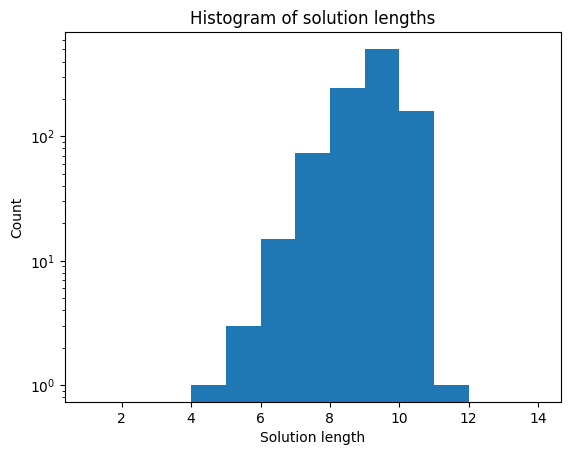

In [28]:
# Make histogram of sln_lens
import matplotlib.pyplot as plt
plt.hist(sln_lens, bins=range(1, 15))
plt.xlabel('Solution length')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of solution lengths')
plt.show()